In [9]:
from drop_lib2 import *
from scipy.io import loadmat
import pickle
from sklearn.ensemble import HistGradientBoostingClassifier

directory = 'ts_fresh_comp'
verbose = 1
data = load_data(verbose=verbose)

Loaded segments shape: (842, 25000)
Speed labels shape: (842,)
Volume labels shape: (842,)
Unique speeds: [1.72 2.08 2.36 2.64 3.13 3.39 3.42]
Unique volumes: [55 77]


In [10]:
# Load the extracted features from the pickle file
# Features takes a very(!) long time to extract, so we precompute them
# and save them in a pickle file.
with open(directory + '/extracted_features.pkl', 'rb') as file:
    extracted_features = pickle.load(file).to_numpy()

In [ ]:
X = extracted_features

 20%|██        | 1/5 [00:14<00:59, 14.87s/it]

Velocity accuracy (fold): 0.9231


 40%|████      | 2/5 [00:31<00:48, 16.10s/it]

Velocity accuracy (fold): 0.9408


 60%|██████    | 3/5 [00:47<00:31, 15.73s/it]

Velocity accuracy (fold): 0.9107


 80%|████████  | 4/5 [01:02<00:15, 15.74s/it]

Velocity accuracy (fold): 0.9345


100%|██████████| 5/5 [01:17<00:00, 15.42s/it]


Velocity accuracy (fold): 0.9107
Velocity accuracy average across all folds: 0.9240±0.0122


 20%|██        | 1/5 [00:05<00:21,  5.27s/it]

Volume accuracy (fold): 0.9172


 40%|████      | 2/5 [00:10<00:15,  5.29s/it]

Volume accuracy (fold): 0.9172


 60%|██████    | 3/5 [00:15<00:10,  5.23s/it]

Volume accuracy (fold): 0.9345


 80%|████████  | 4/5 [00:21<00:05,  5.32s/it]

Volume accuracy (fold): 0.9345


100%|██████████| 5/5 [00:26<00:00,  5.29s/it]

Volume accuracy (fold): 0.9345
Volume accuracy average across all folds - : 0.9276±0.0085
Results saved in directory: ./ts_fresh_comp/
[[ 95   1   5   0   0   2   0]
 [  0 120   0   0   0   2   0]
 [  0   0 107   1   0   5   0]
 [  0   0   1 179   0   2   0]
 [  0   0   0   1  66   0  21]
 [  3   0   1   3   0 135   0]
 [  0   0   0   1  15   0  76]]
[[337  32]
 [ 29 444]]


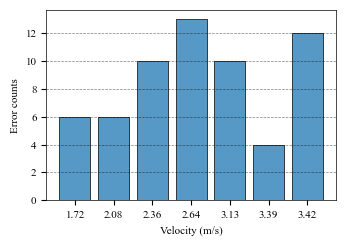

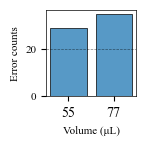

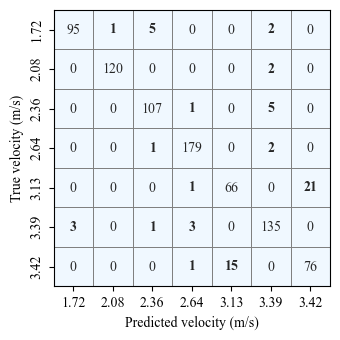

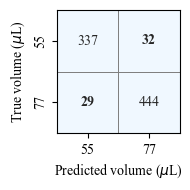

In [12]:
classifier = HistGradientBoostingClassifier(max_iter=250,
                                            max_depth=50,
                                            random_state=42)
confusion_matrices_speed, error_indices_speed, all_cv_scores_speed, \
confusion_matrices_volume, error_indices_volume, all_cv_scores_volume\
    = evaluate_classifier(classifier, classifier, X, data, random_state=42)
save_results(confusion_matrices_speed, error_indices_speed, all_cv_scores_speed,
             confusion_matrices_volume, error_indices_volume, all_cv_scores_volume,
             data,
             directory=directory, verbose=verbose)
plot_results(confusion_matrices_speed, error_indices_speed,
             confusion_matrices_volume, error_indices_volume,
             data,
             directory=directory, verbose=verbose)